# MNIST Deep Learning

### Load the MNIST Dataset

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
# create training and testing sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sns.set(font_scale=2)

In [9]:
import numpy as np

In [10]:
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

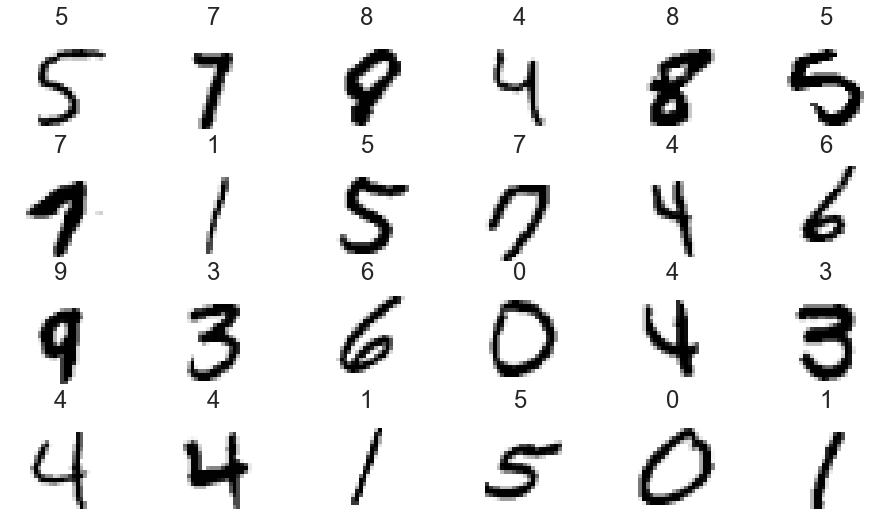

In [11]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))
for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout

### Data Preparation

#### Reshaping the Image data

In [12]:
X_train = X_train.reshape((60_000, 28, 28, 1))

In [13]:
X_train.shape

(60000, 28, 28, 1)

In [14]:
X_test = X_test.reshape((10_000, 28, 28, 1))

In [15]:
X_test.shape

(10000, 28, 28, 1)

#### Normalizing Image Data

In [16]:
# scale pixels 0.0 - 1.0 by dividing each pixel by 255 
X_train = X_train.astype('float32') / 255

In [17]:
X_test = X_test.astype('float32') / 255

#### One-Hot Encoding - Convert labels from integers to categorical data

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train = to_categorical(y_train)

In [20]:
y_train.shape

(60000, 10)

In [21]:
# sample of the number five representation as categorical label
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
y_test = to_categorical(y_test)

In [23]:
y_test.shape

(10000, 10)

### Creating the Neural Network

In [24]:
from tensorflow.keras.models import Sequential

In [25]:
cnn = Sequential()

#### Adding Layers to the Network

In [26]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [27]:
# Add 1st convolution layer
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))

In [28]:
# Add a Pooling Layer
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [29]:
# add 2nd convolution layer and pooling Layer
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [30]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

#### Flattening the results

In [31]:
cnn.add(Flatten())

#### Add dense layer to reduce the number of features

In [32]:
cnn.add(Dense(units=128, activation='relu'))

#### Dense layer to produce final output

In [33]:
cnn.add(Dense(units=10, activation='softmax'))

#### Summary

In [34]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

#### Visualise the Model's Structure

In [35]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

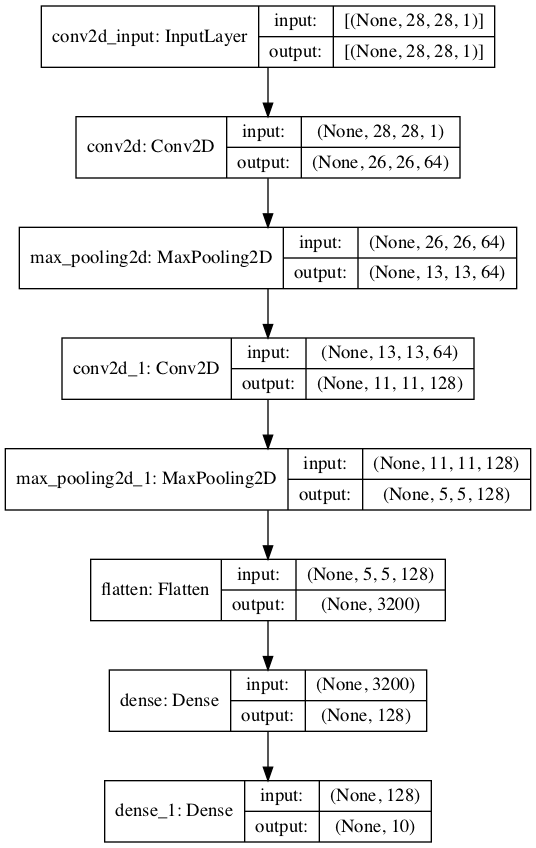

In [36]:
plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png')

#### Compiling the Model

In [37]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

### Training and Evaluating the Model

In [38]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 35s 41ms/step - loss: 0.3067 - accuracy: 0.9048 - val_loss: 0.0528 - val_accuracy: 0.9863
Epoch 2/5
844/844 [==============================] - 34s 40ms/step - loss: 0.0450 - accuracy: 0.9860 - val_loss: 0.0634 - val_accuracy: 0.9850
Epoch 3/5
844/844 [==============================] - 34s 40ms/step - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0.0358 - val_accuracy: 0.9897
Epoch 4/5
844/844 [==============================] - 34s 41ms/step - loss: 0.0193 - accuracy: 0.9944 - val_loss: 0.0380 - val_accuracy: 0.9907
Epoch 5/5
844/844 [==============================] - 33s 40ms/step - loss: 0.0171 - accuracy: 0.9942 - val_loss: 0.0449 - val_accuracy: 0.9873


#### Evaluating the model

In [39]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0388 - accuracy: 0.9881


In [40]:
loss

0.03884575143456459

In [41]:
accuracy

0.988099992275238

#### Making predictions

In [42]:
predictions = cnn.predict(X_test)

In [45]:
y_test[0] #7

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [46]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000012001%
1: 0.0000055941%
2: 0.0002127156%
3: 0.0002342763%
4: 0.0000000007%
5: 0.0000013207%
6: 0.0000000000%
7: 99.9994754791%
8: 0.0000010669%
9: 0.0000624267%


#### Locating the incorrect predictions

In [47]:
images = X_test.reshape((10_000, 28, 28))

In [48]:
incorrect_predictions = []

In [49]:
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

In [50]:
# check the number of incorrect_predictions
len(incorrect_predictions)

119

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

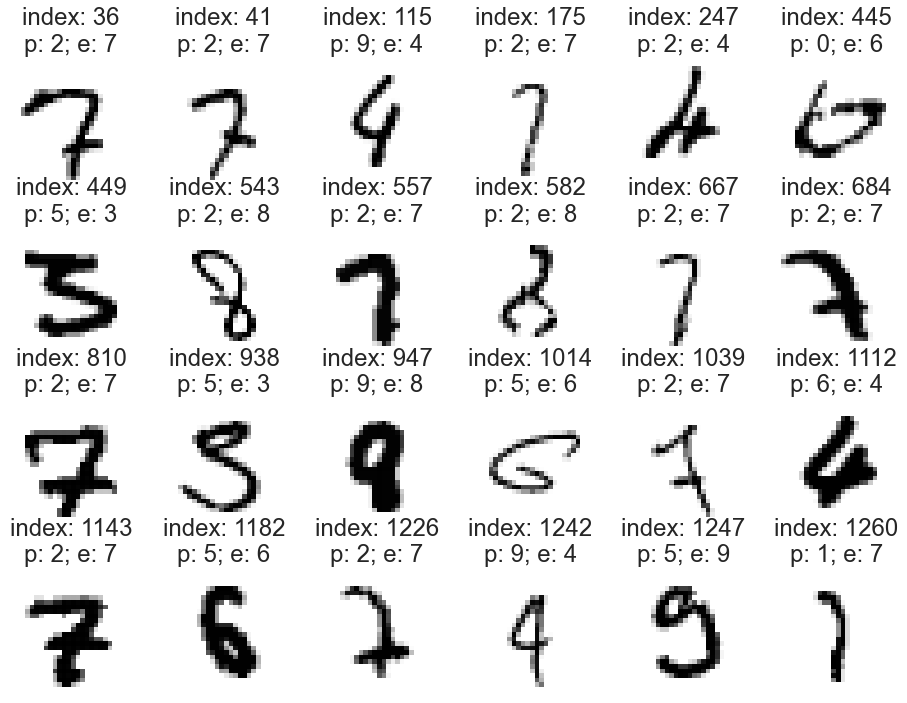

In [52]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))
for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(
        f'index: {index}\np: {predicted}; e: {expected}'
    )
plt.tight_layout

#### Probabilities for incorrect predictions

In [53]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [59]:
# number 6 predicted as 5 - index 1014
display_probabilities(predictions[1014])

0: 1.7309067771%
1: 0.0000119506%
2: 0.0020911690%
3: 0.0000384999%
4: 0.0001699527%
5: 96.9975352287%
6: 1.2651417404%
7: 0.0000001289%
8: 0.0032201435%
9: 0.0008843503%


In [60]:
# number 4 predicted as 6 - index 1112
display_probabilities(predictions[1112])

0: 0.0946792134%
1: 0.0000209124%
2: 0.0091935079%
3: 0.0000137820%
4: 0.8648482151%
5: 0.0000351645%
6: 99.0311145782%
7: 0.0000002380%
8: 0.0000218920%
9: 0.0000743929%


In [61]:
# number 8 predicted as number 2 - index 543
display_probabilities(predictions[543])

0: 0.0227293407%
1: 0.0031893924%
2: 78.1234025955%
3: 0.0199364600%
4: 0.0019439645%
5: 0.0001641629%
6: 0.0000107105%
7: 0.3630505176%
8: 21.4364558458%
9: 0.0291254779%
